

# **Section 1**
**Dataset**

The dataset I chose for this project is data from the 2016 AP exams. It includes information like exam, score, grade of students that took the exam, and the race of the students. I chose this dataset because I thought it was relevant to current day since AP scores recently came out. I found this dataset on Kaggle.

The rows in this dataset show the class and the total number of students that received each score, including all scores and average score. The columns show breakdowns by grade, gender, and race.

In [7]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/exams (1).csv')

string_columns = ['Exam Subject', 'Score']

columns_to_process = [col for col in df.columns if col not in string_columns]
for col in columns_to_process:
    # Use pd.to_numeric to attempt conversion, replacing non-numeric with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in columns_to_process:
    if df[col].isnull().any(): # Check if the column has any NaNs to impute
        median_value = df[col].median() # Calculate the median of the non-NaN values
        df[col].fillna(median_value, inplace=True) # Fill NaNs with the calculated median
        print(f"Column '{col}': NaNs filled with median ({median_value:.2f})")

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Column 'Students (Black)': NaNs filled with median (280.00)
Column 'Students (American Indian/Alaska Native)': NaNs filled with median (19.00)
Column 'Students (Native Hawaiian/Pacific Islander)': NaNs filled with median (13.50)


/tmp/ipython-input-7-1635900098.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True) # Fill NaNs with the calculated median


,Exam Subject,Score,Students (11th Grade),Students (12th Grade),Students (Male),Students (Female),Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,897.00,1260.00,815.00,1889.0,1631.00,34.00,321.0,514.00,5.0,5.00,154.00,2704.0
1,ART HISTORY,4,1835.00,2608.00,1800.00,3787.0,3290.00,132.00,918.0,877.00,13.0,8.00,273.00,5587.0
2,ART HISTORY,3,2311.00,3282.00,2283.00,4657.0,3898.00,287.00,1347.0,992.00,19.0,10.00,307.00,6940.0
3,ART HISTORY,2,2252.00,3248.00,2374.00,4494.0,3211.00,450.00,1972.0,809.00,15.0,21.00,280.00,6868.0
4,ART HISTORY,1,901.00,1352.00,1072.00,1699.0,942.00,307.00,1074.0,292.00,13.0,10.00,87.00,2771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,WORLD HISTORY,3,6545.00,2420.00,39591.00,42884.0,45861.00,4517.00,14432.0,12251.00,232.0,142.00,4002.00,82475.0
255,WORLD HISTORY,2,5339.00,1994.00,33795.00,47281.0,37512.00,7133.00,21994.0,8844.00,319.0,187.00,3847.00,81076.0
256,WORLD HISTORY,1,2863.00,1452.00,21091.00,34966.0,15426.00,9429.00,23501.0,3629.00,337.0,181.00,2268.00,56057.0
257,WORLD HISTORY,All,20642.00,8204.00,125991.00,155455.0,134519.00,23017.00,66826.0,37977.00,981.0,589.00,13176.00,281446.0


# **Section 2**
**Exploratory Data Analysis**


I wanted to see which grade had the higher total number of students that were taking AP courses, and if filtering the dataset to only including popular courses would change the totals.

First I created a seperate dataframe by filtering the big dataframe to only include the rows that have the total number of students that took the exam and got a score.

In [8]:
all_scores_df = df[['Exam Subject','Score','Students (11th Grade)', 'Students (12th Grade)']]
all_scores_df = all_scores_df[all_scores_df.Score == 'All']
all_scores_df



,Exam Subject,Score,Students (11th Grade),Students (12th Grade)
5,ART HISTORY,All,8196.0,11750.0
12,BIOLOGY,All,88395.0,104830.0
19,CALCULUS AB,All,79591.0,203370.0
26,CALCULUS BC,All,30500.0,76766.0
33,CHEMISTRY,All,82134.0,47324.0
40,CHINESE LANGUAGE & CULTURE,All,3173.0,3098.0
47,COMPUTER SCIENCE A,All,18770.0,23426.0
54,MACROECONOMICS,All,16763.0,101975.0
61,MICROECONOMICS,All,13344.0,52591.0
68,ENGLISH LANGUAGE & COMPOSITION,All,466057.0,49553.0


Using this dataframe, I calculated the total number of students that took an AP exam according to their respective grades.

In [9]:
all_eleventh_studentssum = all_scores_df['Students (11th Grade)'].sum()
all_eleventh_studentssum


np.float64(1758958.0)

In [10]:
all_twelfth_studentssum = all_scores_df['Students (12th Grade)'].sum()
all_twelfth_studentssum


np.float64(1935408.0)

Next, I calculated the sum of the number of juniors and seniors that took any of the top 5 most popular classes for their respective grade.

In [11]:
five_pop_eleventh_df = all_scores_df[['Exam Subject','Score', 'Students (11th Grade)']]
five_pop_eleventh_df = five_pop_eleventh_df.nlargest(5,'Students (11th Grade)')
pop_eleventh_studentssum = five_pop_eleventh_df['Students (11th Grade)'].sum()
pop_eleventh_studentssum

five_pop_eleventh_df


,Exam Subject,Score,Students (11th Grade)
68,ENGLISH LANGUAGE & COMPOSITION,All,466057.0
250,U.S. HISTORY,All,400864.0
187,PSYCHOLOGY,All,107804.0
173,PHYSICS 1,All,96857.0
12,BIOLOGY,All,88395.0


In [12]:

five_pop_twelfth_df = all_scores_df[['Exam Subject','Score', 'Students (12th Grade)']]
five_pop_twelfth_df = five_pop_twelfth_df.nlargest(5,'Students (12th Grade)')
pop_twelfth_studentssum = five_pop_twelfth_df['Students (12th Grade)'].sum()
pop_twelfth_studentssum
five_pop_twelfth_df

,Exam Subject,Score,Students (12th Grade)
75,ENGLISH LITERATURE & COMPOSITION,All,341254.0
117,GOVERNMENT & POLITICS: U.S.,All,213198.0
19,CALCULUS AB,All,203370.0
222,STATISTICS,All,147625.0
187,PSYCHOLOGY,All,143693.0



It made sense that there were more seniors taking AP courses overall, with around 1.93 million seniors as opposed to about 1.76 million juniors.

However, it was interesting to see that when you filtered the data to include only the top 5 most popular courses for each grade (which differed between juniors and seniors), there were more juniors enrolled in their grade's top 5 courses than seniors were in theirs, with approximately 1.16 million juniors compared to only about 1.05 million seniors.

At first, statistically, it was surprising to see that fewer seniors take popular courses than juniors, but this makes sense psychologically. Juniors may be more likely to take the more common or "expected" courses for their grade level, while seniors often branch out into less common or more diverse courses.

One thing that I couldn't account for was that students can take multiple AP courses, meaning their data might be counted more than once. Since this dataset doesn't include individual student information, though, I wasn't able to tell how many unique students were taking these courses.




# **Section 3**
**Exploratory Data Visualization**

For this section, I created bar graphs that showed how many students from each grade took each AP course.

<Axes: xlabel='Exam Subject'>

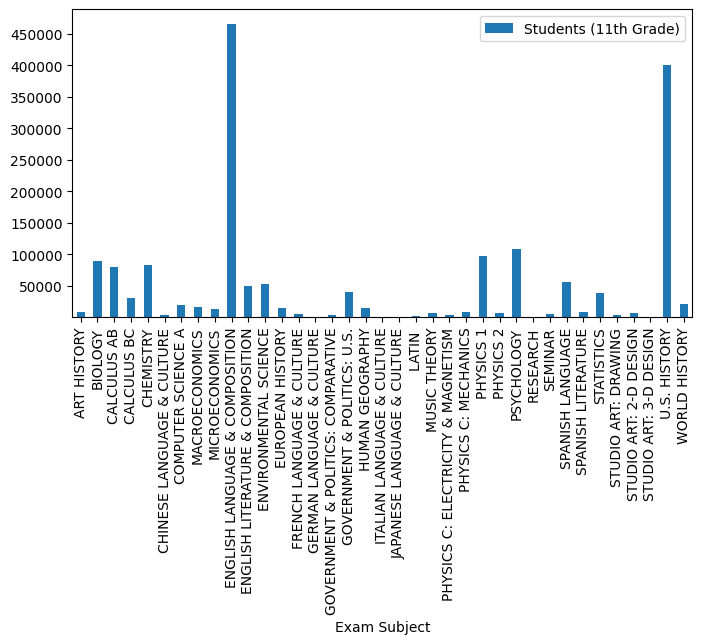

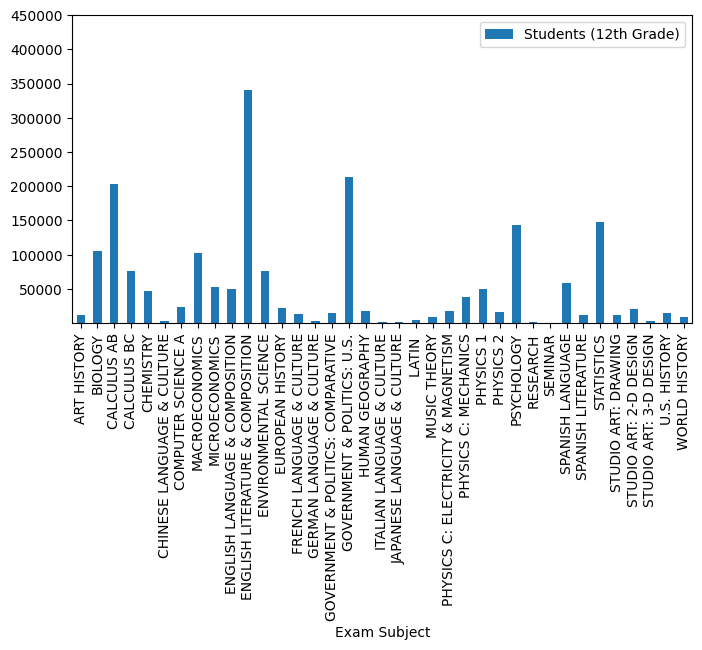

In [ ]:
all_scores_df.plot.bar(x="Exam Subject", y='Students (11th Grade)', yticks=[50000,100000,150000,200000,250000,300000,350000,400000,450000], figsize=(8,4))

all_scores_df.plot.bar(x="Exam Subject", y='Students (12th Grade)', yticks=[50000,100000,150000,200000,250000,300000,350000,400000,450000], figsize=(8,4))

After creating these bar plots, we can see that the most popular AP classes for juniors, US History and English Language and Comp, had a significantly higher amount of students than all the other APs.

On the contrary, for seniors, even though you can tell that there were a few courses that were more popular than others, the graph was still more even and spread out without many extreme classes.

# **Section 4**
**Data Science**

The question I wanted to answer about my dataset was if race had any correlation with AP score. To answer this question, I'm going to perform hypothesis testing three times, comparing the six racial groups of my dataset in pairs.

The first pair I'm going to test is White and Asian.

The second testing pair is going to be Hispanic/Latino and Native Hawaiian/Pacific Islander.

The third testing pair is going to be Black and American Indian/Alaska Native.

In [ ]:
only_scores_df = df[(df['Score'] != 'All') & (df['Score'] != 'Average')]




White and Asian:

In [ ]:
from statsmodels.stats.weightstats import ztest
import numpy as np

# Sample data for two independent groups
scores_white = []
scores_asian = []
only_scores_df = only_scores_df.reset_index(drop=True)

# Perform the two-sample Z-test
# value=0 assumes the null hypothesis that the difference in means is 0
for i in range(len(only_scores_df)):
  score = int(only_scores_df['Score'][i])
  count_white = int(only_scores_df['Students (White)'][i])
  count_asian = int(only_scores_df['Students (Asian)'][i])

  scores_white += [score] * count_white
  scores_asian += [score] * count_asian

z_statistic, p_value = ztest(x1=scores_white, x2=scores_asian, value=0)

print(f"z-statistic: {z_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group means.")

z-statistic: -128.31962134572038
p-value: 0.0
Reject the null hypothesis: The means of the two groups are significantly different.




Hispanic/Latino and Native Hawaiian/Pacific Islander

In [ ]:
from statsmodels.stats.weightstats import ztest
import numpy as np

# Sample data for two independent groups
scores_hl = []
scores_pacific = []
only_scores_df = only_scores_df.reset_index(drop=True)

# Perform the two-sample Z-test
# value=0 assumes the null hypothesis that the difference in means is 0
for i in range(len(only_scores_df)):
  score = int(only_scores_df['Score'][i])
  count_hl = int(only_scores_df['Students (Hispanic/Latino)'][i])
  count_pacific = int(only_scores_df['Students (Native Hawaiian/Pacific Islander)'][i])

  scores_hl += [score] * count_hl
  scores_pacific += [score] * count_pacific

z_statistic, p_value = ztest(x1=scores_hl, x2=scores_pacific, value=0)

print(f"z-statistic: {z_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group means.")

z-statistic: -1.5671137514092564
p-value: 0.11708810546298301
Fail to reject the null hypothesis: No significant difference found between group means.




Black and American Indian/Alaska Native

In [ ]:
from statsmodels.stats.weightstats import ztest
import numpy as np

# Sample data for two independent groups
scores_black = []
scores_native = []
only_scores_df = only_scores_df.reset_index(drop=True)

# Perform the two-sample Z-test
# value=0 assumes the null hypothesis that the difference in means is 0
for i in range(len(only_scores_df)):
  score = int(only_scores_df['Score'][i])
  count_black = int(only_scores_df['Students (Black)'][i])
  count_native = int(only_scores_df['Students (American Indian/Alaska Native)'][i])

  scores_black += [score] * count_black
  scores_native += [score] * count_native

z_statistic, p_value = ztest(x1=scores_black, x2=scores_native, value=0)

print(f"z-statistic: {z_statistic}")
print(f"p-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group means.")

z-statistic: -23.053466055789052
p-value: 1.3577473614306912e-117
Reject the null hypothesis: The means of the two groups are significantly different.


# **Section 5**
**Overall Summary**

After performing all three hypothesis tests, we found that the p-value was less than 0.05 when comparing White with Asian and Black with American Indian/Alaska Native meaning that their differences in mean scores is significant, rejecting the null hypothesis. However when comparing Hispanic/Latino with Native Hawaiian/Pacific Islander, the p-value was greater than 0.05, meaning that there was no significant difference in the means of the two groups. We can conclude that the significant differences between some races hint that there are systemic differences in the resources available for each group. This could hint at unequal access to education, support, or other opportunities that are important to student success. For example, schools in some communities may have fewer AP class offerings or less funding overall. These differences can lead to the achievement gap seen between students from different racial backgrounds. These gaps show how important it is to consider the resources schools provide and how that affects student success.

It's also important to note that the only AP score data I could find was from 2016, so conditions may have changed since then. Due to this reason, the results found from this hypothesis testing might not be representative of the current-day situation. If more recent data was available, it would be interesting to see if these inequalities still exist or if progress has been made. Additionally, other factors not discussed, such as the possibility of one student taking multiple tests, could also be influencing these results. It's important to consider these potential confounders and limitations while interpreting results from data analyses, since they could affect the accuracy of the conclusions made.